<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula4a_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [74]:
X, y = dataset.data, dataset.target
print(X.shape, y.shape)

(569, 30) (569,)


In [75]:
sum(y)/len(y)

0.6274165202108963

# inverte classes

In [76]:
y = y==0
sum(y)/len(y)

0.37258347978910367

In [124]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

              precision    recall  f1-score   support

           1       0.97      0.87      0.92        38
           0       0.94      0.99      0.96        76

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



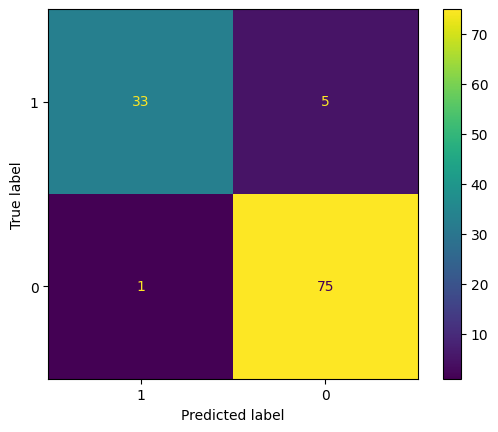

In [139]:
import numpy as np
from numpy.linalg import pinv
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix, \
ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay

def addBias(X):
  return np.hstack((np.ones((X.shape[0], 1)), X))

class classificador_linear(BaseEstimator, ClassifierMixin):
  def __init__(self):
    self.threshold = 0.5

  def fit(self, X, y):
    X = addBias(X)
    self.w = pinv(X.T @ X) @ X.T @ y

  def predict(self, X):
    X = addBias(X)
    return (X @ self.w) > self.threshold


clf = classificador_linear()
clf.fit(X_tr, y_tr)
ypred = clf.predict(X_te)
print(classification_report(y_te, ypred, labels=[1,0]))
disp = ConfusionMatrixDisplay(confusion_matrix(y_te, ypred, labels=[1,0]), display_labels=[1,0])
disp.plot()

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        38
           0       0.93      0.93      0.93        76

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



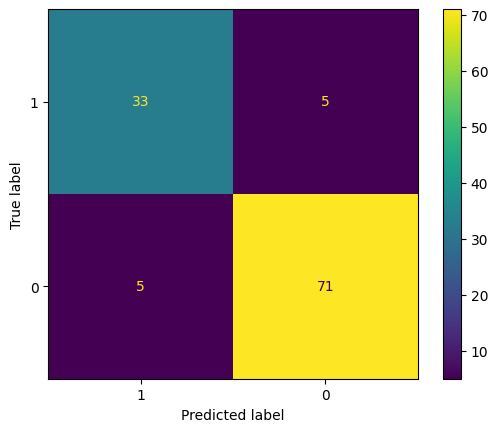

In [148]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_tr, y_tr)
ypred = clf.predict(X_te)
print(classification_report(y_te, ypred, labels=[1,0]))
disp = ConfusionMatrixDisplay(confusion_matrix(y_te, ypred, labels=[1,0]), display_labels=[1,0])
disp.plot()

In [248]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
splitter = RepeatedStratifiedKFold(random_state=42)

In [249]:
clf = classificador_linear()
scores = cross_validate(clf, X, y, cv=splitter)
print(sum(scores['test_score'])/len(scores['test_score']))
scores_clin = scores['test_score']

0.9557118459866476


In [250]:
clf = KNeighborsClassifier()
scores = cross_validate(clf, X, y, cv=splitter)
print(sum(scores['test_score'])/len(scores['test_score']))
scores_knn = scores['test_score']

0.9316394969725192


In [251]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
scores = cross_validate(clf, X, y, cv=splitter)
print(sum(scores['test_score'])/len(scores['test_score']))
scores_rf = scores['test_score']

0.9579894426331313


In [252]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(scores_clin, scores_rf)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference between the two models.")
else:
    print("There is no statistically significant difference between the two models.")

T-statistic: -0.6155306877408607
P-value: 0.5396311761387247
There is no statistically significant difference between the two models.
